In [3]:
#导入模块
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
%matplotlib inline

In [4]:
#获取数据
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#数据可视化
#（1）查看有无缺失值
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#（2）用年龄的均值进行缺失值的填充
mean = titanic['age'].mean()
print(mean)
titanic['age']=titanic['age'].fillna(mean)
titanic.isnull().sum()

29.69911764705882


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

C:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

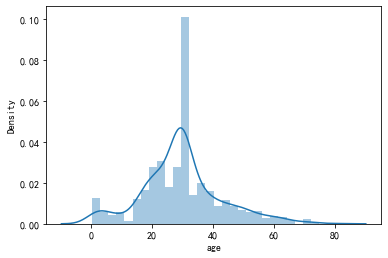

In [7]:
#(3)年龄分布的可视化
sns.distplot(titanic['age'])

In [8]:
#(4)显示登船地点（S,C,Q）的人数
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [9]:
#（5）对登陆地点进行缺失值的填充
titanic['embarked']=titanic['embarked'].fillna('S')
titanic['embarked'].isnull().sum()

0

In [10]:
#（6）对于deck字段，由于缺失值太多，将其删除
del titanic['deck']
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:xlabel='sex', ylabel='count'>

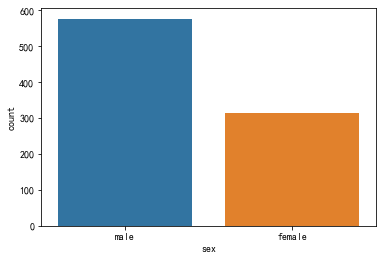

In [11]:
#数据探索
#（1）可视化乘客的性别分布
sns.countplot(x="sex",data=titanic)

<AxesSubplot:xlabel='sex', ylabel='age'>

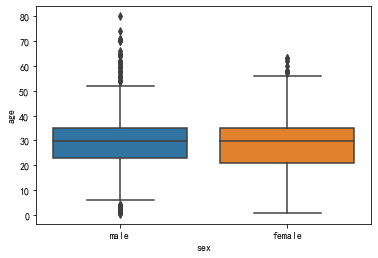

In [12]:
#(2)基于性别，绘制乘客年龄分布箱线图
sns.boxplot(x = 'sex',y = 'age',data = titanic)

<AxesSubplot:xlabel='class', ylabel='count'>

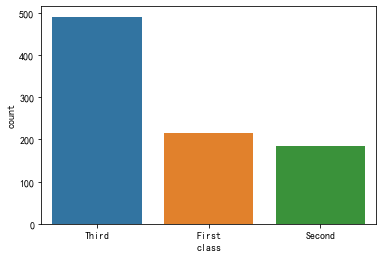

In [13]:
#(3)对船等级进行计数
sns.countplot(x="class",data=titanic)

<AxesSubplot:xlabel='class', ylabel='age'>

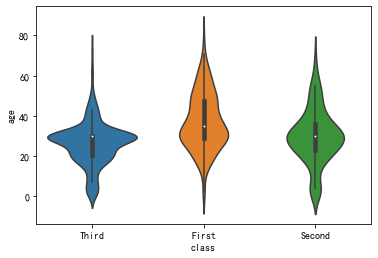

In [14]:
#(4)结合船舱等级，绘制乘客年龄分布的小提琴图
sns.violinplot(y = 'age',x = 'class',data = titanic)

In [15]:
#(5)对年龄进行分级，分开小孩和老人的数据
def agelevel(age):
    if age<=16:
        return 'child'
    elif age>=60:
        return 'old'
    else:
        return 'middle'
titanic['age_level'] = titanic['age'].map(agelevel)
titanic.head()
    

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_level
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,middle
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,middle
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,middle
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,middle
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,middle


<AxesSubplot:xlabel='age_level', ylabel='count'>

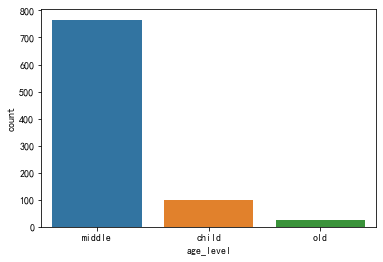

In [16]:
#(6)对分级后的年龄可视化
sns.countplot(x = 'age_level',data = titanic)

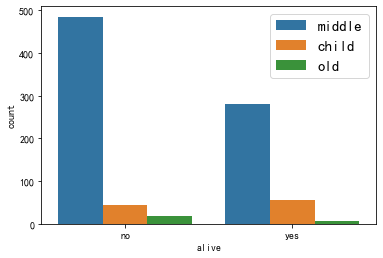

In [17]:
#(7)分析乘客年龄与生还乘客之间的关系
sns.countplot(x = 'alive',hue = 'age_level',data = titanic)
plt.legend(loc = "best",fontsize = '15')